In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras import backend as K
import cv2
import datagen
import ensemble_functions
import model as unet_model_script
import random
import matplotlib.pyplot as plt
import importlib
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve

Using TensorFlow backend.


In [2]:
importlib.reload(datagen)
importlib.reload(unet_model_script)
importlib.reload(ensemble_functions)

<module 'ensemble_functions' from 'C:\\Users\\krcma\\Desktop\\tf_segmentation\\unet_segmentation\\ensemble_functions.py'>

In [3]:
image_size = 240
num_slices = 155

In [ ]:
ensemble_functions.evaluate_ensemble("../models/2020051001/", "3_ensemble", 10, image_size, 0.8, 1)

# Image postprocessing

-- min, max chyba, std, mean pre kazdeho pacienta
-- skusit hybat prah 0.5 na 0.45 0.55
-- vyhodnotit: base, base + dropout(0.5), base + dropout(0.2), 
-- skusit uzavriet regiony a porovnat chyby
-- postprocessing -- uzatvara diery v segmentacii. Da sa to d obinaru, zoberie sa vonkajsia kontura.. (openCV

-- spravne vyfarbit jednotlive kategorie + pridat legendu, aby bolo jasne vidno co kam patri
-- zvyraznit hustotu tkaniva 

-- vyhodnotit pomocou cisel hlavne
-- pridat vizualizacie, aby sa lahsie vysvetlovali vystupy,

In [4]:
x_val, y_val = datagen.get_whole_patient(number=1, 
                  file_path='../dataset/', 
                  mode='test', 
                  glioma_type=['HGG'], 
                  image_size=240                     
                )

In [5]:
models = ensemble_functions.get_models("../models/2020051001/", "1_ensemble", 1, 4, verbose=1)

Loading model ../models/2020051001/1_ensemble_1.h5
Loading model ../models/2020051001/1_ensemble_2.h5
Loading model ../models/2020051001/1_ensemble_3.h5
Loading model ../models/2020051001/1_ensemble_4.h5


In [6]:
predictions = ensemble_functions.get_predictions(models, x_val[0], 1, 4, verbose=1)

Model 1 predictions
155/155 [==============================] - 8s 50ms/step
Model 2 predictions
155/155 [==============================] - 2s 13ms/step
Model 3 predictions
155/155 [==============================] - 2s 13ms/step
Model 4 predictions
155/155 [==============================] - 2s 13ms/step


In [7]:
final_mask = ensemble_functions.create_mask(predictions, num_slices, image_size, p=0.8)

In [8]:
print(y_val.shape, x_val.shape, predictions[1].shape, final_mask.shape)

(1, 1, 155, 1, 240, 240) (1, 155, 4, 240, 240) (155, 1, 240, 240) (155, 1, 240, 240)


[0. 1. 2. 3. 4.]
[0. 1. 2. 4.]


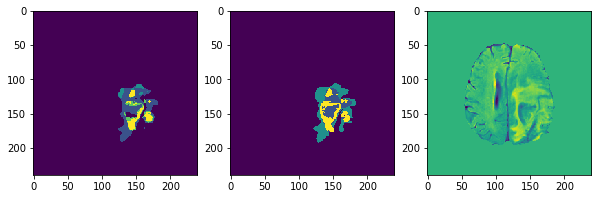

In [16]:
pslice = random.randint(60, 100)
# # i=76
print(np.unique(final_mask[pslice]))
print(np.unique(y_val[0][0][pslice]))

# # Plot
f, axarr = plt.subplots(1,3, figsize=(10,10))
axarr[0].imshow(final_mask[pslice][0])
axarr[1].imshow(y_val[0][0][pslice][0])
axarr[2].imshow(x_val[0][pslice][0])

In [ ]:
# tumor_region = 1

# fpr, tpr, thresholds = roc_curve(np.matrix.flatten(datagen.convert_labels(y_val[0][0], tumor_region, image_size)), 
#                                  np.matrix.flatten(predictions[tumor_region]))
# # calculate the g-mean for each threshold
# gmeans = np.sqrt(tpr * (1-fpr))
# # locate the index of the largest g-mean
# ix = np.argmax(gmeans)
# print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', linestyle=':', linewidth=4)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Some extension of Receiver operating characteristic to multi-class')
# plt.legend(loc="lower right")
# plt.show()

In [ ]:
# tumor_region = 4
# precision, recall, thresholds = precision_recall_curve(np.matrix.flatten(datagen.convert_labels(y_val[0][0], tumor_region, image_size)), 
#                                  np.matrix.flatten(predictions[tumor_region]))

In [ ]:
# best_precision = np.argmax(precision)
# best_recall = np.argmax(recall)
# # print(recall)
# # print(thresholds)
# print("best_precision", thresholds[best_precision])
# print("best_recall", thresholds[best_recall])